# Naive Classifier for Fake news recognition

## Packages

In [2]:
library(tidyverse)
library(ggplot2)
library(stopwords)
library(tidytext)
library(stringr)
library(purrr)
library(magrittr)

# Reading the data

### Kaggle dataset

In [4]:
train.filename <- 'dataset/archive/train.csv'
test.filename <- 'dataset/archive/test.csv'

In [5]:
train.df <- read.delim(train.filename, sep = ',')
test.df <- read.delim(test.filename, sep = ',')

### Second dataset

# Display the train and test datasets

In [7]:
head(train.df)

Labels
1 1     
2 2     
3 3     
4 1     
5 2     
6 5     
  Text                                                                                                                                                       
1 Says the Annies List political group supports third-trimester abortions on demand.                                                                         
2 When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.              
3 Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."                                                  
4 Health care reform legislation is likely to mandate free sex change surgeries.                                                                             
5 The economic turnaround started at the end of my term.                                                                                                     
6 The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
  Text_Tag                          
1 abortion                          
2 energy,history,job-accomplishments
3 foreign-policy                    
4 health-care                       
5 economy,jobs                      
6 education

In [6]:
head(test.df)

Text                                                                                                                                                 
1 Building a wall on the U.S.-Mexico border will take literally years.                                                                                 
2 Wisconsin is on pace to double the number of layoffs this year.                                                                                      
3 Says John McCain has done nothing to help the vets.                                                                                                  
4 Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.                                                                
5 When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.                      
6 Over the past five years the federal government has paid out $601 million in retirement and disability benefits to deceased former federal employees.
  Text_Tag                                          
1 immigration                                       
2 jobs                                              
3 military,veterans,voting-record                   
4 medicare,message-machine-2012,campaign-advertising
5 campaign-finance,legal-issues,campaign-advertising
6 federal-budget,pensions,retirement

# Splitting the datasets

In [8]:
# shuffle
set.seed(29062023)
train.df=train.df[sample(1:nrow(train.df), replace = F),] # shuffle the dataset

In [9]:
# set splitting percentages
perc_split <- 0.8  # set splitting percentages
n_rows <- nrow(train.df)
n_rows_train <- floor(n_rows * perc_split)

In [10]:
# splitting
train.df.train <- train.df[1:n_rows_train, ]
train.df.validation <- train.df[-c(1:n_rows_train), ]

In [11]:
cat('Total rows:',nrow(train.df),
    '\nTrain rows:',nrow(train.df.train),
    '\nValidation rows',nrow(train.df.validation))

Total rows: 10240 
Train rows: 8192 
Validation rows 2048

## Histogram of labels

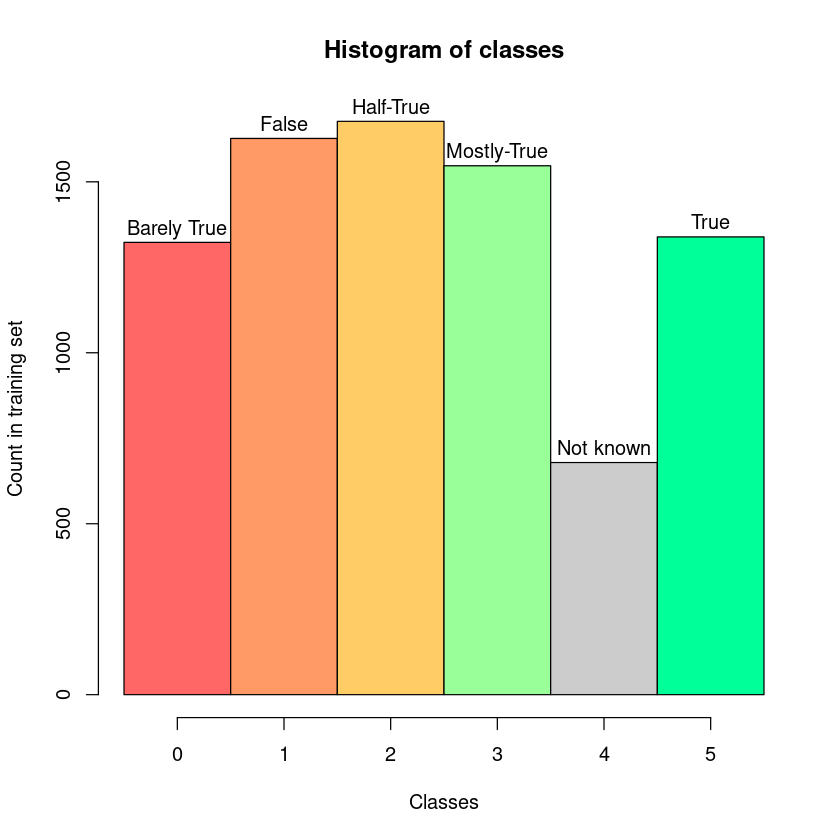

In [13]:
breaks <- seq(from=-0.5, to=5.5, by=1)
labels <- c('Barely True', 'False', 'Half-True', 'Mostly-True', 'Not known', 'True')
colors <- c('#FF6666','#FF9966', '#FFCC66', '#99FF99' , '#CCCCCC','#00FF99')

classess<-hist(x = train.df.train$Labels, 
     breaks = breaks, 
     labels = labels,
     main = 'Histogram of classes',
     xlab = 'Classes',
     ylab = 'Count in training set',
     col = colors
    )

## Defining the prior of each classes

In [14]:
prior.classes<-class$density

## Stop words

In [15]:
as.list(get_stopwords())$word

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "will"

# Cleaning function

In [16]:
cleaning_tokens <- function(token.df){
    word <- ifelse(endsWith(token.df[,1], "s"), substr(token.df[,1], 1, nchar(token.df[,1]) - 1), token.df[,1])
    word <- ifelse(endsWith(word, "'"), substr(word, 1, nchar(word) - 1), word)
    word <- ifelse(str_detect(word, "[0-9]+"), '--number--', word)
    return(as.data.frame(word))
}

# Vocabulary

In [31]:
tags_numbers <- list(tags = c('Barely True', 'False', 'Half-True', 'Mostly-True', 'Not known', 'True'),
                     numbers = c(0:5))

### Vocabulary before feature selection

In [50]:
vocabulary <- function(train.df.train, tags_numbers){
    #take in input a df with 'Text' column containing the messages and 'tag_numbers' the names of the labels
    
    myframes <- list()

    for (i in 1:length(tags_numbers$tags)) {
        tag <- tags_numbers$tags[i]

        train.df.train %>%
        filter(Labels == tags_numbers$numbers[i]) %>%
        select(Text) %>%
        unnest_tokens(word, Text) %>%
        anti_join(get_stopwords(), by = join_by(word)) %>%
        cleaning_tokens %>%
        arrange(word) %>%
        group_by(word) %>%
        reframe(counts = n()) %>%
        arrange(desc(counts)) %>%
        setNames(c("word", tag)) -> myframes[[i]]
    } 
    counts<-purrr::reduce(myframes, dplyr::full_join, by = 'word')
    counts %<>% replace(is.na(.),0)
    return(counts)
}

In [51]:
counts <- vocabulary(train.df.train, tags_numbers)
head(counts)

word       Barely True False Half-True Mostly-True Not known True
1 --number-- 693         784   1106      1157        259       872 
2 say        361         417    411       334        192       268 
3 state      157         214    224       237         60       228 
4 year       154         170    217       224         45       178 
5 obama      134         164    142        84        105        73 
6 percent    121         129    216       243         34       191

## Feature Selection 

In [52]:
n_classes <- 6

## With frequency mean

In [68]:
frequency_mean_feature_selection <- function(counts, n_classes, frac=0.5 ){
    counts %>%
        select(-word) %>%
        colSums() -> tot_counts_per_class
    
    counts_prob <- cbind(counts["word"], counts[2:(n_classes+1)]/tot_counts_per_class)
    counts_prob["mean"] <- rowMeans(counts_prob[2:(n_classes+1)])
    
    counts_prob %>%
        arrange(desc(mean)) %>%
        top_frac(frac, mean) -> vocabulary.train.features
    
    counts %>%
        right_join(vocabulary.train.features["word"], by = join_by(word)) -> naive.bayes.vocabulary
    
    return(naive.bayes.vocabulary)
}

In [70]:
naive.bayes.vocabulary <- frequency_mean_feature_selection(counts, n_classes, frac=0.7)
head(naive.bayes.vocabulary)

word       Barely True False Half-True Mostly-True Not known True
1 --number-- 693         784   1106      1157        259       872 
2 say        361         417    411       334        192       268 
3 state      157         214    224       237         60       228 
4 year       154         170    217       224         45       178 
5 obama      134         164    142        84        105        73 
6 percent    121         129    216       243         34       191

In [73]:
likelihood <- function(naive.bayes.vocabulary){
    naive.bayes.vocabulary %>%
        select(-word) %>%
        colSums() -> tot_counts_per_class
    
    den <- tot_counts_per_class + length(naive.bayes.vocabulary[[1]])
    
    likelihood.token <- cbind(naive.bayes.vocabulary["word"], (naive.bayes.vocabulary[2:(n_classes+1)] + 1)/den)
    return(likelihood.token)
}

In [77]:
likelihood.token <- likelihood(naive.bayes.vocabulary )
head(likelihood.token)

word       Barely True False       Half-True   Mostly-True Not known  
1 --number-- 0.032559231 0.033689541 0.042941929 0.048245980 0.019096585
2 say        0.015535814 0.016214748 0.017165236 0.024605215 0.009250827
3 state      0.006129020 0.008957587 0.016525891 0.011407755 0.002861834
4 year       0.006457795 0.012559677 0.010449120 0.010555947 0.001974164
5 obama      0.009915534 0.007908738 0.006708890 0.003647912 0.004111874
6 percent    0.005847673 0.006098991 0.009312905 0.009465068 0.001458212
  True       
1 0.041844414
2 0.012620221
3 0.009827904
4 0.006943636
5 0.003083076
6 0.014102093

## With absolute counts per class
To implement

## Nayve Bayes

In [83]:
bayes.probability <- function(token.list, likelihood.token, prior.classes){
    
    likelihood.token %>%
        select(-word) %>%
        colSums() -> tot_counts_per_class
    
    den <- tot_counts_per_class + length(likelihood.token[[1]])
    
    query_out <- log(as.numeric(prior.classes))
    for (i in 1:length(token.list)) {
        query <- log(as.numeric(likelihood.token[likelihood.token["word"] == token.list[i]][2:7]))
        if (is.na(query[1])) {
        query <- as.numeric(log(1/den))
        }
 
        query_out <- query_out + query
    
    }
    query_out <- exp(query_out)
    query_out <- query_out/sum(query_out)
    return(query_out)
}

In [84]:
tweet_tokenize <- function(msg){
    tib <- data.frame(msg)
    colnames(tib) <- 'tweet'
    tib %>% unnest_tokens(word, tweet) %>%
    anti_join(get_stopwords(), by = join_by(word)) %>%
    cleaning_tokens -> token.list
    return(token.list)    
}

In [85]:
naive.bayes <- function(msg, likelihood.token, prior.classes){
    token.list<-as.vector(tweet_tokenize(msg))
    probability <- bayes.probability(token.list,likelihood.token, prior.classes )
    predicted_class <- which.max(probability)-1
    return(predicted_class)
}

## Test on validation set

In [88]:
predicted_classes <- lapply(X=train.df.validation$Text, FUN=naive.bayes,likelihood.token=likelihood.token,prior.classes=prior.classes)

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.cla

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.cla

Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'ogge

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'ogge

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto no

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.cla

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'ogge

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto no

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'ogge

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto no

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo d

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.cla

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introd

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in bayes.probability(token.list, likelihood.token, prior.classes):
“NA introdotti per coercizione”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”
Warning message in FUN(left, right):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza pi

In [89]:
sum(predicted_classes==train.df.validation$Labels)/length(train.df.validation$Labels)

[1] 0.2167969